In [1]:
import pandas as pd
import numpy as np
#use sklearn.naive_bayes.MultinomialNB to predict
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
feedback = pd.read_csv('feedback_posts.csv')
feedback.head()

,timestamp,post_id,subject,content,response,sentiment
0,2024-05-22 10:10:47,1,React,sorry to bother you,happy to help,negative
1,2024-05-22 10:10:46,2,Git,out of left field,include me in the meeting,negative
2,2024-05-22 10:10:45,3,NPM,that being said,I do not know,positive
3,2024-05-22 10:10:44,4,Data Science,I need a partner,I do not know,positive
4,2024-05-22 10:10:43,5,Claim,a no-brainer,this is unrelated,positive


In [3]:
feedback.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  1000 non-null   object
 1   post_id    1000 non-null   int64 
 2   subject    1000 non-null   object
 3   content    1000 non-null   object
 4   response   1000 non-null   object
 5   sentiment  1000 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [4]:
#Make new dataframe with just homeworld and unit type
subcont = feedback[['content', 'sentiment']].copy()
subcont

,content,sentiment
0,sorry to bother you,negative
1,out of left field,negative
2,that being said,positive
3,I need a partner,positive
4,a no-brainer,positive
...,...,...
995,sorry to bother you,negative
996,that being said,negative
997,this is exhausting,negative
998,at the end of the day,positive


In [5]:
#Change positive and negative to 1 and 0, respectively
subcont[subcont[['sentiment']] == 'positive'] = 1
subcont[subcont[['sentiment']] == 'negative'] = 0

subcont.head()

,content,sentiment
0,sorry to bother you,0
1,out of left field,0
2,that being said,1
3,I need a partner,1
4,a no-brainer,1


In [6]:
subcont.astype({'sentiment': 'int32'}).dtypes

content      object
sentiment     int32
dtype: object

In [7]:
subcont.to_csv('posts_sentiment.csv', index=False)

In [8]:
df = pd.read_csv('posts_sentiment.csv')

In [9]:
df.head()

,content,sentiment
0,sorry to bother you,0
1,out of left field,0
2,that being said,1
3,I need a partner,1
4,a no-brainer,1


In [10]:
df.dtypes

content      object
sentiment     int64
dtype: object

In [11]:
#Split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df['content'], df['sentiment'], test_size = 0.2, random_state = 42) #80% training, 20% test

In [12]:
# Create a CountVectorizer to convert text data into numerical features
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [13]:
print(X_train_vec)
vectorizer.get_feature_names_out()

  (0, 40)	1
  (0, 48)	1
  (1, 57)	1
  (1, 63)	1
  (1, 10)	1
  (1, 69)	1
  (2, 31)	2
  (2, 30)	2
  (2, 65)	1
  (3, 59)	1
  (3, 35)	1
  (3, 56)	1
  (4, 4)	1
  (4, 49)	1
  (4, 39)	1
  (4, 33)	1
  (4, 50)	1
  (5, 2)	1
  (6, 44)	1
  (6, 60)	1
  (6, 55)	1
  (6, 47)	1
  (7, 41)	1
  (7, 67)	1
  (8, 2)	1
  :	:
  (792, 33)	1
  (792, 50)	1
  (793, 60)	1
  (793, 53)	1
  (793, 26)	1
  (793, 23)	1
  (794, 38)	1
  (794, 21)	1
  (795, 44)	1
  (795, 60)	1
  (795, 55)	1
  (795, 47)	1
  (796, 41)	1
  (796, 12)	1
  (797, 41)	1
  (797, 67)	1
  (798, 57)	1
  (798, 63)	1
  (798, 10)	1
  (798, 69)	1
  (799, 43)	1
  (799, 45)	1
  (799, 1)	1
  (799, 53)	1
  (799, 27)	1


array(['absolutely', 'am', 'amazing', 'answer', 'as', 'at', 'back',
       'ball', 'bang', 'being', 'bother', 'box', 'brainer', 'buck',
       'circle', 'day', 'do', 'end', 'exhausting', 'field', 'for',
       'forward', 'get', 'ground', 'hard', 'help', 'hit', 'ideas',
       'interesting', 'irregardless', 'is', 'it', 'know', 'last', 'left',
       'makes', 'meeting', 'morning', 'moving', 'my', 'need', 'no', 'not',
       'of', 'on', 'out', 'outside', 'page', 'partner', 'per', 'post',
       'provide', 'rolling', 'running', 'said', 'same', 'sense', 'sorry',
       'thanks', 'that', 'the', 'think', 'this', 'to', 'we', 'what',
       'will', 'worries', 'write', 'you', 'your'], dtype=object)

In [14]:
feature_names = vectorizer.get_feature_names_out()
X_train_vec_df = pd.DataFrame(X_train_vec.toarray(),columns = feature_names)
X_train_vec_df.head()

,absolutely,am,amazing,answer,as,at,back,ball,bang,being,...,think,this,to,we,what,will,worries,write,you,your
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Train a Multinomial Naive Bayes classifier
mnb = MultinomialNB()
mnb.fit(X_train_vec, y_train)

MultinomialNB()

In [16]:
# Predict on the test set
y_pred = mnb.predict(X_test_vec)

In [17]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
#conf_matrix = confusion_matrix(y_test, y_pred)
#class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
#print("Confusion Matrix:")
#print(conf_matrix)
#print("Classification Report:")
#print(class_report)

Accuracy: 0.55


In [19]:
#Save to model as a pickle file named trained_model.pkl
import pickle 

# using a context manager create and open a file
# f = open('decision_tree_model.pkl', 'wb')
# pickle.dump(clf, f)
# f.close()
with open('trained_model.pkl', 'wb') as f:
    pickle.dump(mnb, f)

print(f"Model saved to pickle")

Model saved to pickle


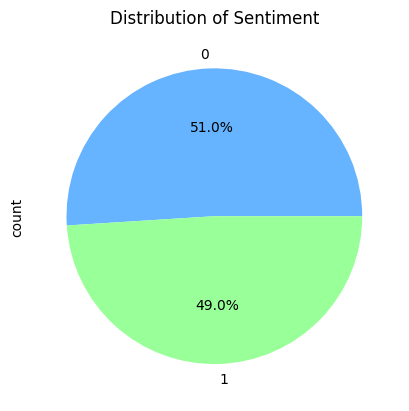

In [20]:
# EDA 1: Distribution of Classes
class_distribution = df['sentiment'].value_counts()
class_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff','#99ff99'])
plt.title('Distribution of Sentiment')
plt.show()

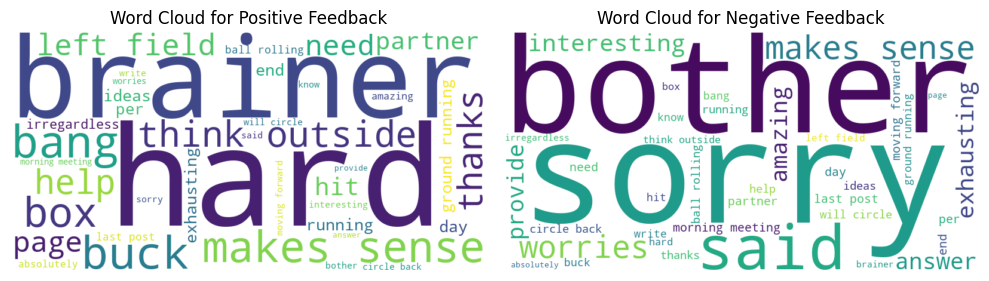

In [22]:
# Generate WordCloud for Positive Content
positive_text = ' '.join(df[df['sentiment'] == 1]['content'])
positive_wordcloud2 = WordCloud(width=800, height=400, max_words=100, background_color='white', random_state=42).generate(positive_text)
 
# Generate WordCloud for Negative Content
negative_text = ' '.join(df[df['sentiment'] == 0]['content'])
negative_wordcloud2 = WordCloud(width=800, height=400, max_words=100, background_color='white', random_state=42).generate(negative_text)
 
# Plot the WordClouds
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud2, interpolation='bilinear')
plt.title('Word Cloud for Positive Feedback')
plt.axis('off')
 
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud2, interpolation='bilinear')
plt.title('Word Cloud for Negative Feedback')
plt.axis('off')
 
plt.tight_layout()
plt.show()